<a href="https://colab.research.google.com/github/Demilian123/Big-Data-Analytics-And-Business-Intelligence/blob/main/Tisha_Assignment8_April17_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

b1 =  5.3950492860956665
b2 = -5.979882333878031
bo =  250.9992924427385


Text(0.5, 0, 'y')

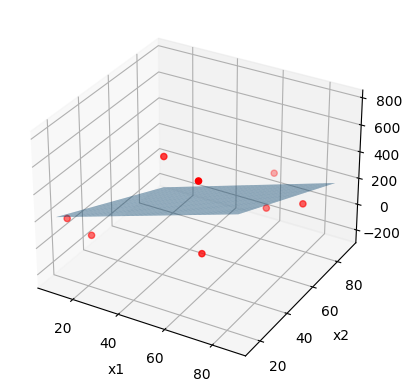

In [12]:
# Q1) Implement Multiple Linear Regression (MLR) in python manually using formula.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

x1 = [10,70,67,60,71,20,45,88]
x2 = [22,66,24,90,15,23,34,61]
y = [140,120,159,122,782,56,662,289]
sum1 = sum(x1)
sum2 = sum(x2)
sum3 = sum(y)

l1 = statistics.mean(x1)
l2 = statistics.mean(x2)
l3 = statistics.mean(y)


a = 0
for i in x1:
  a += i*i


b = 0
for i in x2:
  b += i*i


product = 0
for i in range(len(x1)):
  product += x1[i] * y[i]


product2 = 0
for i in range(len(x2)):
  product2 += x2[i] * y[i]


product3 = 0
for i in range(len(x2)):
  product3 += x2[i] * x1[i]



x1sqr = a - (sum1 * sum1)/len(x1)
x2sqr = b - (sum2 * sum2)/len(x2)
x1y = product - (sum1 * sum3)/len(x1)
x2y = product2 - (sum2 * sum3)/len(x1)
x1x2 = product3 - (sum1 * sum2)/len(x1)

a1 = x2sqr * x1y - x1x2 * x2y
a2 = x1sqr * x2sqr - x1x2 * x1x2
a = a1 / a2
print("b1 = ",a)

c1 = x1sqr * x2y - x1x2 * x1y
c2 = x1sqr * x2sqr - x1x2 * x1x2
c = c1 / c2
print("b2 =",c)

value = l3 - a*l1 - c*l2
print("bo = ",value)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x1, x2, y, color='r', marker='o', label='Data Points')

xx1, xx2 = np.meshgrid(range(min(x1), max(x1)), range(min(x2), max(x2)))
yy = a*xx1 + c*xx2 + value


ax.plot_surface(xx1, xx2, yy, alpha=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1.360
Date:                Wed, 17 Apr 2024   Prob (F-statistic):              0.338
Time:                        18:05:00   Log-Likelihood:                -54.033
No. Observations:                   8   AIC:                             114.1
Df Residuals:                       5   BIC:                             114.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        250.9993    231.420      1.085      0.3

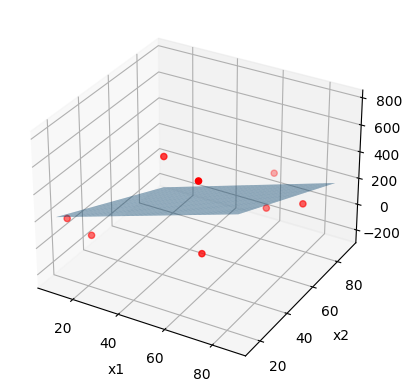

In [13]:
# Q1) Implement Multiple Linear Regression (MLR) in python using ml.

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data
x1 = [10,70,67,60,71,20,45,88]
x2 = [22,66,24,90,15,23,34,61]
y = [140,120,159,122,782,56,662,289]

# Create DataFrame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Add constant for intercept
data = sm.add_constant(df)

# Fit regression model
model = sm.OLS(data['y'], data[['const', 'x1', 'x2']]).fit()

# Print summary
print(model.summary())

# Print b0 (intercept)
print("b0 =", model.params['const'])

# Create 3D plot
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')

# Scatter plot
axis.scatter(data['x1'], data['x2'], data['y'], color='r', marker='o', label='Data Points')

# Create grid coordinates for the regression plane
xx1, xx2 = np.meshgrid(range(min(x1), max(x1)), range(min(x2), max(x2)))
yy = model.params['x1']*xx1 + model.params['x2']*xx2 + model.params['const']

# Plot the regression plane
axis.plot_surface(xx1, xx2, yy, alpha=0.5)

# Setting labels
axis.set_xlabel('x1')
axis.set_ylabel('x2')
axis.set_zlabel('y')

#Plotting the figure
plt.show()
